# 📌ACTIVIDAD 3: CREAR UN SISTEMA TASADOR DE VIVIENDAS.

### DEFINIR Y RECOPILAR DATOS
En primer lugar debemos ponernos de acuerdo de manera que cada uno de nosotros piense una
característica que: <br><br>
• Pueda influir en el precio de una vivienda.<br><br>
• Sea una información que tengamos la capacidad de recolectar.<br><br>
ENTREGA 5: Añade al documento enlace enlace: <br><br>
a) En la hoja de cálculo "datos_viviendas.xlsl" en la hoja datos, añade una columna cuyo
prefijo tenga tus iniciales. Ya tiene estas nueve: josrosrod_autor, josrosrod_origen,
josrosrod_municipio, josrosrod_dia, josrosrod_mes, josrosrod_año, josrosrod_lat,
josrosrod_lon, josrosrod_precio<br><br>
b) En la hoja "descripción" añade una descripción del significado de esa columna y de cómo se
puede conseguir. Ya tendrás anotaciones de las características que están añadidas.<br><br>
Cuando ya tengamos definidas las características que vamos a utilizar para esta actividad, vamos a
recolectar datos, al menos 10 cada uno. Intentando completar la información que no dispongamos
(intentaremos no inventar nada, de manera que cuando algo no lo sepamos, tendremos que indicar de
donde lo hemos conseguido). No puedes dejar más de un valor ausente en tus datos.

ENTREGA: <br><br>
a0) Añade a la hoja de cálculo 10 ejemplos y aporta una columna.<br><br>
a) Análisis y preprocesamiento de datos:<br><br>
• Análisis de datos: histogramas, boxplots, cantidad de datos ausentes, presencia de
outliers.<br><br>
• Codificación de categóricas: label-encoding o one-hot-encoding.<br><br>
• Detección e imputación de ausentes.<br><br>
• Detección e imputación de anomalías.<br><br>
• Escalado de numéricas.<br><br>
• Debes ir creando un pipeline de manera que se le facilite uno de los ejemplos y lo
preprocese para dárselo al modelo.<br><br>
a) Selección de características:<br><br>
• Matriz de correlaciones y mapa de calor: más fácil de interpretar si dejas el target como
la primera característica.<br><br>
• Estudio estadístico univariado (eliminar características con poca influencia en target).<br><br>
• Estudio de colinealidad por parejas (eliminar alta correlación entre predictoras).<br><br>
c) Selección de modelos de regresión: debes considerar al menos 5 diferentes y uno de ellos el
método de mínimos cuadrados. Recuerda que tienes LinearRegressor, SGDRegressor, Ridge,
Lasso, ElasticNet, K-NN, polinómico...<br><br>
d) Estudio de varianza de modelos con CV.<br><br>
e) Seleccionar los dos que mejor desempeño muestren justificando su elección.<br><br>
f) Configuración de hiperparámetros con grid-search en los mejores 2 modelos seleccionados.<br><br>
f) Estudio final de errores en las predicciones y gráfico de importancia de características.<br><br>
g) Selección justificada del mejor y su descripción:<br><br>
• Qué predictoras utiliza.<br><br>
• Una descripción de su utilización y procesos que realiza (preprocesamiento, ...).<br><br>
• Qué desempeño alcanza en train y test (indica también la métrica empleada)<br><br>
• Una valoración final de tu modelo según los resultados obtenidos.<br><br>
h) Guarda el modelo en un fichero con el nombre <iniciales>_modelo_u02_p03_a3.joblib
donde <iniciales> son las 3 primeras letras del nombre y apellidos, en mi caso sería
"josrosrod_modelo_u02_p03_a3.joblib".<br><br>
La entrega de esta última actividad es el 70% de la nota de la práctica y se valora:<br><br>
• 50% puntos por la entrega: la realización de las actividades propuestas.<br><br>
• Al modelo que entregues se le pedirá que realice 10 predicciones con datos probablemente no
vistos. Según el error promedio que cometa se le asignará posición en un ranking. En función
de la posición que ocupe (lo bien que lo haga), conseguirá más o menos puntuación adicional
hasta completar el 20% restante


## 1. Carga de datos

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
from sklearn.tree import DecisionTreeRegressor

# Cargar datos (modificar con el nombre de tu archivo)
df = pd.read_excel("recursos/datos_viviendas.xlsx")
target = 'josrosrod_precio'
categoricas = ['josrosrod_origen', 'jorosrod_municipio','alvbelnav_iluminacion','luctarcom_orientacion']
numericas = ['josrosrod_dia','josrosrod_mes', 'josrosrod_año','ricmirber_longitud','josrosrod_lat','josrosrod_precio','davsoreng_duplex','alegarsal_terraza','rafmaralf_baños','samartlop_superficie','davroctau_planta','juamarxxx_trastero','robripcon_habitaciones','omapasvac_ascensor','elilopper_distanciaCentro','rauramesc_airecentral','guifue_parking']

In [99]:
df.head()

,josrosrod_origen,jorosrod_municipio,josrosrod_dia,josrosrod_mes,josrosrod_año,ricmirber_longitud,josrosrod_lat,josrosrod_precio,alvbelnav_iluminacion,davsoreng_duplex,...,rafmaralf_baños,luctarcom_orientacion,samartlop_superficie,davroctau_planta,juamarxxx_trastero,robripcon_habitaciones,omapasvac_ascensor,elilopper_distanciaCentro,rauramesc_airecentral,guifue_parking
0,Fotocasa,Benetuser,16.0,2.0,2025.0,-0.395,39.418,140000.0,Alta,0.0,...,1.0,Sureste,81.0,1.0,1.0,3.0,1.0,6.0,1.0,0.0
1,Fotocasa,Benetuser,16.0,2.0,2025.0,-0.398,39.417,85000.0,Alta,0.0,...,1.0,Este,161.0,1.0,0.0,1.0,0.0,7.0,1.0,0.0
2,Fotocasa,Benetuser,16.0,2.0,2025.0,-0.3987,39.4149,225000.0,Alta,0.0,...,2.0,Este,179.0,1.0,1.0,3.0,0.0,6.0,1.0,0.0
3,Fotocasa,Benetuser,16.0,2.0,2025.0,-0.399,39.4145,129999.0,Alta,0.0,...,1.0,Sur,89.0,2.0,0.0,3.0,1.0,6.0,0.0,0.0
4,Fotocasa,Benetuser,16.0,2.0,2025.0,-0.3985,39.4133,145000.0,Baja,0.0,...,1.0,Oeste,55.0,1.0,0.0,1.0,1.0,6.0,1.0,0.0


## 2. Análisis exploratorio (gráficos, valores ausentes, outliers)


In [100]:
print(df.describe())

       josrosrod_dia  josrosrod_mes  josrosrod_año  josrosrod_precio  \
count     141.000000     141.000000     141.000000      1.410000e+02   
mean       15.657143       2.500000    2022.385714      3.436194e+05   
std         6.128122       2.306822       9.881863      5.937963e+05   
min         1.000000       1.000000    1963.000000      5.000000e+03   
25%        13.000000       2.000000    2025.000000      1.450000e+05   
50%        16.000000       2.000000    2025.000000      2.100000e+05   
75%        20.000000       2.000000    2025.000000      3.000000e+05   
max        31.000000      12.000000    2025.000000      5.000000e+06   

       davsoreng_duplex  alegarsal_terraza  rafmaralf_baños  \
count        141.000000         141.000000       141.000000   
mean           0.290780           0.666667         2.092857   
std            0.471154           0.487950         1.413690   
min            0.000000           0.000000         1.000000   
25%            0.000000           0.

In [101]:
print(df.isnull().sum())

josrosrod_origen             4
jorosrod_municipio           4
josrosrod_dia                3
josrosrod_mes                3
josrosrod_año                3
ricmirber_longitud           3
josrosrod_lat                3
josrosrod_precio             3
alvbelnav_iluminacion        4
davsoreng_duplex             3
alegarsal_terraza            3
rafmaralf_baños              3
luctarcom_orientacion        5
samartlop_superficie         3
davroctau_planta             4
juamarxxx_trastero           4
robripcon_habitaciones       3
omapasvac_ascensor           4
elilopper_distanciaCentro    3
rauramesc_airecentral        3
guifue_parking               3
dtype: int64


In [102]:
print(df.columns)


Index(['josrosrod_origen', 'jorosrod_municipio', 'josrosrod_dia',
       'josrosrod_mes', 'josrosrod_año', 'ricmirber_longitud', 'josrosrod_lat',
       'josrosrod_precio', 'alvbelnav_iluminacion', 'davsoreng_duplex',
       'alegarsal_terraza', 'rafmaralf_baños', 'luctarcom_orientacion',
       'samartlop_superficie', 'davroctau_planta', 'juamarxxx_trastero',
       'robripcon_habitaciones', 'omapasvac_ascensor',
       'elilopper_distanciaCentro', 'rauramesc_airecentral', 'guifue_parking'],
      dtype='object')


In [103]:
print(df.shape)


(144, 21)


In [104]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   josrosrod_origen           140 non-null    object 
 1   jorosrod_municipio         140 non-null    object 
 2   josrosrod_dia              141 non-null    float64
 3   josrosrod_mes              141 non-null    float64
 4   josrosrod_año              141 non-null    float64
 5   ricmirber_longitud         141 non-null    object 
 6   josrosrod_lat              141 non-null    object 
 7   josrosrod_precio           141 non-null    float64
 8   alvbelnav_iluminacion      140 non-null    object 
 9   davsoreng_duplex           141 non-null    float64
 10  alegarsal_terraza          141 non-null    float64
 11  rafmaralf_baños            141 non-null    float64
 12  luctarcom_orientacion      139 non-null    object 
 13  samartlop_superficie       141 non-null    float64

In [105]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
139    False
140    False
141     True
142     True
143    False
Length: 144, dtype: bool


In [106]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(144, 21)
(136, 21)


En este análisis, se ha decidido no eliminar los registros duplicados, ya que pueden ser relevantes para el modelo. En situaciones como la de los pisos, donde dos registros pueden ser aparentemente idénticos pero con una ligera diferencia en alguna característica (como el precio, el tamaño o la ubicación), eliminar estos duplicados podría afectar negativamente al rendimiento del modelo. Si se eliminan estas diferencias, se perdería información valiosa que podría ayudar al modelo a identificar patrones sutiles pero significativos en los datos. En lugar de eliminar los duplicados, se ha optado por mantener estos registros para preservar la diversidad de las observaciones y mejorar la capacidad del modelo para generalizar mejor en situaciones del mundo real.



### Visualizacion de datos


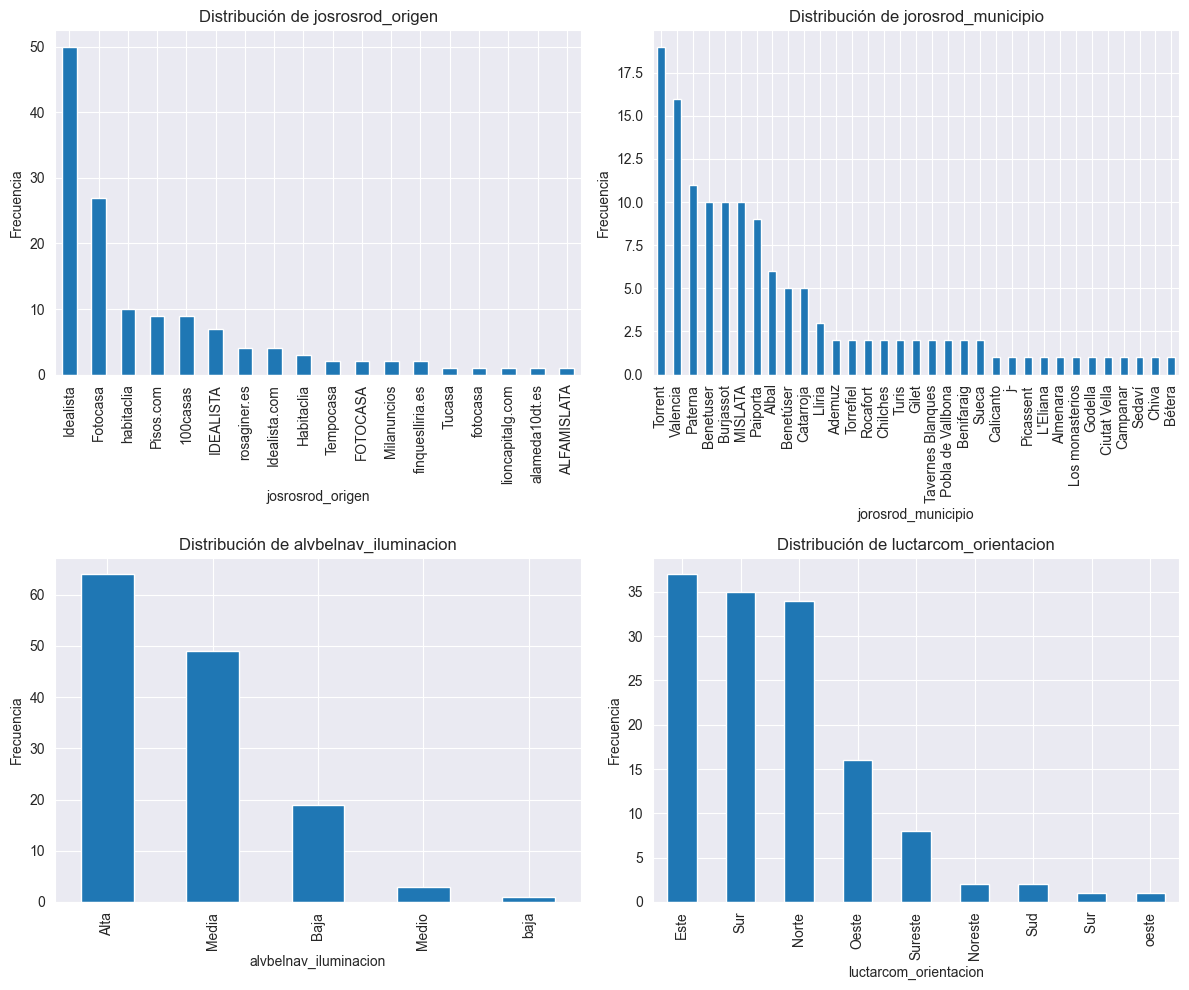

In [107]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, var in enumerate(categoricas):
    df[var].value_counts().plot(kind='bar', ax=axes[i])  # Gráfico de barras
    axes[i].set_title(f'Distribución de {var}')
    axes[i].set_ylabel('Frecuencia')

for j in range(len(categoricas), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [108]:
df['alvbelnav_iluminacion'] = df['alvbelnav_iluminacion'].replace("media", "Media")
df['alvbelnav_iluminacion'] = df['alvbelnav_iluminacion'].replace("baja", "Baja")
df['alvbelnav_iluminacion'] = df['alvbelnav_iluminacion'].replace("Medio", "Media")

In [109]:
df['josrosrod_origen'] = df['josrosrod_origen'].replace("IDEALISTA", "Idealista")
df['josrosrod_origen'] = df['josrosrod_origen'].replace("Idealista.com", "Idealista")
df['josrosrod_origen'] = df['josrosrod_origen'].replace("FOTOCASA", "Fotocasa")
df['josrosrod_origen'] = df['josrosrod_origen'].replace("fotocasa", "Fotocasa")

In [110]:
df['luctarcom_orientacion'] = df['luctarcom_orientacion'].replace("Sud", "Sur")
df['luctarcom_orientacion'] = df['luctarcom_orientacion'].replace("Sur ", "Sur")
df['luctarcom_orientacion'] = df['luctarcom_orientacion'].replace("oeste", "Oeste")

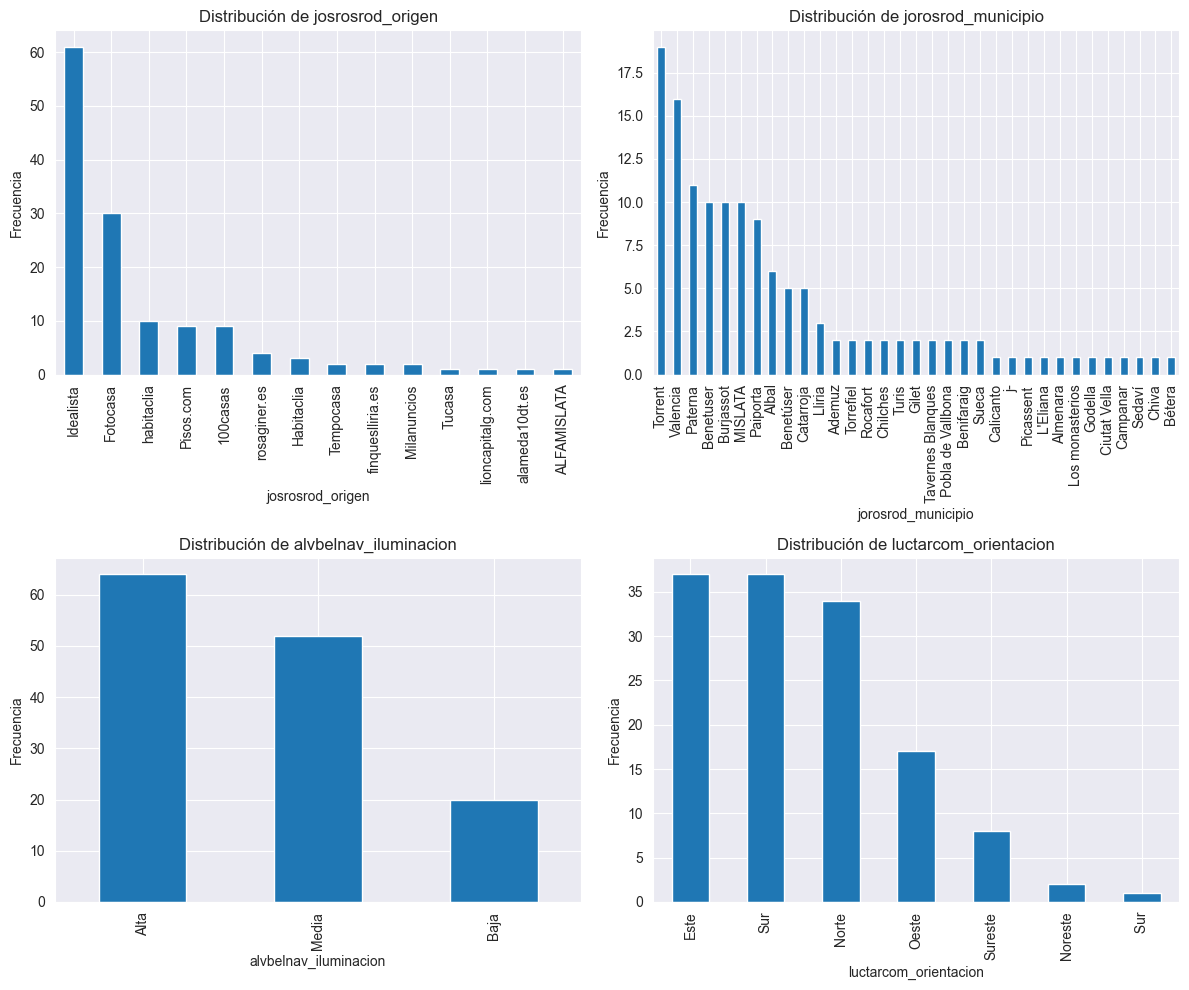

In [111]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, var in enumerate(categoricas):
    df[var].value_counts().plot(kind='bar', ax=axes[i])  # Gráfico de barras
    axes[i].set_title(f'Distribución de {var}')
    axes[i].set_ylabel('Frecuencia')

for j in range(len(categoricas), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


## 3. Ingeniería de características


In [112]:
# Aplicar strip solo a valores que contienen espacios (y no sean NaN)
df['luctarcom_orientacion'] = df['luctarcom_orientacion'].apply(lambda x: x.strip() if isinstance(x, str) and ' ' in x else x)

print(df['luctarcom_orientacion'].value_counts())

luctarcom_orientacion
Sur        38
Este       37
Norte      34
Oeste      17
Sureste     8
Noreste     2
Name: count, dtype: int64


In [113]:
# Definir las columnas categóricas
categoricas = ['josrosrod_origen', 'jorosrod_municipio', 'alvbelnav_iluminacion', 'luctarcom_orientacion']

# Aplicar LabelEncoder a cada columna categórica
for col in categoricas:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

# Verificar el resultado
df.head()

,josrosrod_origen,jorosrod_municipio,josrosrod_dia,josrosrod_mes,josrosrod_año,ricmirber_longitud,josrosrod_lat,josrosrod_precio,alvbelnav_iluminacion,davsoreng_duplex,...,rafmaralf_baños,luctarcom_orientacion,samartlop_superficie,davroctau_planta,juamarxxx_trastero,robripcon_habitaciones,omapasvac_ascensor,elilopper_distanciaCentro,rauramesc_airecentral,guifue_parking
0,2,3,16.0,2.0,2025.0,-0.395,39.418,140000.0,0,0.0,...,1.0,5,81.0,1.0,1.0,3.0,1.0,6.0,1.0,0.0
1,2,3,16.0,2.0,2025.0,-0.398,39.417,85000.0,0,0.0,...,1.0,0,161.0,1.0,0.0,1.0,0.0,7.0,1.0,0.0
2,2,3,16.0,2.0,2025.0,-0.3987,39.4149,225000.0,0,0.0,...,2.0,0,179.0,1.0,1.0,3.0,0.0,6.0,1.0,0.0
3,2,3,16.0,2.0,2025.0,-0.399,39.4145,129999.0,0,0.0,...,1.0,4,89.0,2.0,0.0,3.0,1.0,6.0,0.0,0.0
4,2,3,16.0,2.0,2025.0,-0.3985,39.4133,145000.0,1,0.0,...,1.0,3,55.0,1.0,0.0,1.0,1.0,6.0,1.0,0.0


In [114]:
# Función para limpiar valores incorrectos
def limpiar_float(valor):
    if isinstance(valor, str):  # Asegurar que es string
        valor = valor.replace(',', '.')  # Reemplazar comas por puntos
        partes = valor.split('.')  # Dividir por los puntos

        if len(partes) > 2:  # Si hay más de un punto, corregimos el formato
            valor = partes[0] + '.' + ''.join(partes[1:])  # Mantener solo el primer punto

    try:
        return float(valor)  # Intentar convertir a float
    except ValueError:
        return None  # Si hay error, devolver NaN

# Aplicar la limpieza a la columna
df['josrosrod_lat'] = df['josrosrod_lat'].apply(limpiar_float)

In [115]:
df['ricmirber_longitud'] = df['ricmirber_longitud'].apply(limpiar_float)


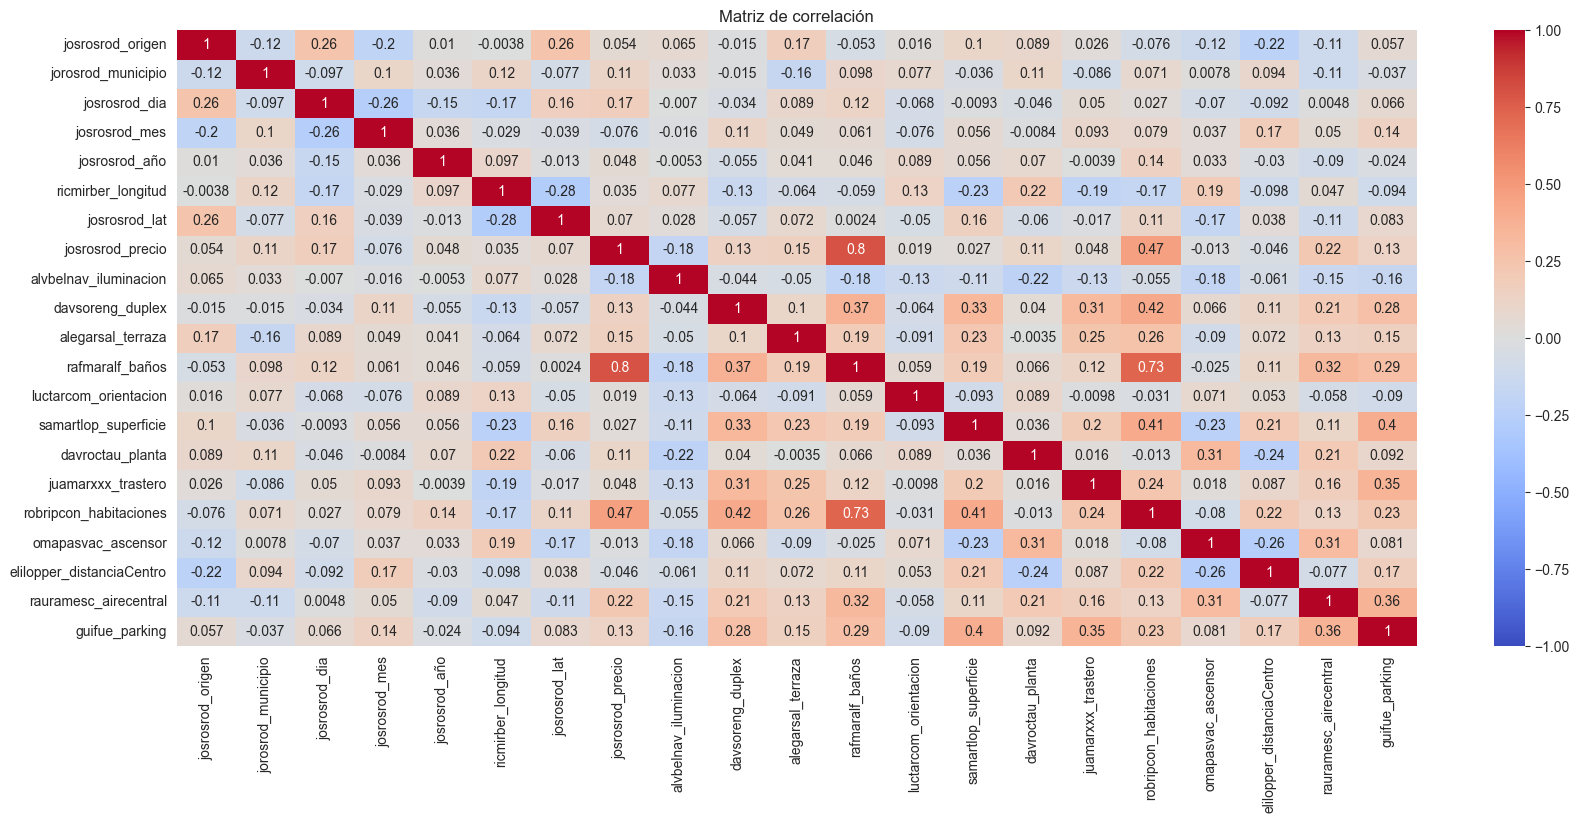

In [116]:
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm")
heatmap.set_title('Matriz de correlación')
plt.show()

Vamos a escoger las variables con más relación a la objetivo `josrosrod_precio`: `rafmaralf_baños`, `robripcon_habitaciones`, `elilopper_distanciaCentro`, `josrosrod_dia`, `alegarsal_terraza`, `davsoreng_duplex` <br><br>
Si se presta atención a la columna target, visualizando la correlación con el resto de variables se han escogido las variables anteriores ya que presentan una alta correlación tanto positiva como negativa en comparación con el resto después de haber aplicado escalarización y ingeniería de características

In [117]:
df.head()

,josrosrod_origen,jorosrod_municipio,josrosrod_dia,josrosrod_mes,josrosrod_año,ricmirber_longitud,josrosrod_lat,josrosrod_precio,alvbelnav_iluminacion,davsoreng_duplex,...,rafmaralf_baños,luctarcom_orientacion,samartlop_superficie,davroctau_planta,juamarxxx_trastero,robripcon_habitaciones,omapasvac_ascensor,elilopper_distanciaCentro,rauramesc_airecentral,guifue_parking
0,2,3,16.0,2.0,2025.0,-0.3950,39.4180,140000.0,0,0.0,...,1.0,5,81.0,1.0,1.0,3.0,1.0,6.0,1.0,0.0
1,2,3,16.0,2.0,2025.0,-0.3980,39.4170,85000.0,0,0.0,...,1.0,0,161.0,1.0,0.0,1.0,0.0,7.0,1.0,0.0
2,2,3,16.0,2.0,2025.0,-0.3987,39.4149,225000.0,0,0.0,...,2.0,0,179.0,1.0,1.0,3.0,0.0,6.0,1.0,0.0
3,2,3,16.0,2.0,2025.0,-0.3990,39.4145,129999.0,0,0.0,...,1.0,4,89.0,2.0,0.0,3.0,1.0,6.0,0.0,0.0
4,2,3,16.0,2.0,2025.0,-0.3985,39.4133,145000.0,1,0.0,...,1.0,3,55.0,1.0,0.0,1.0,1.0,6.0,1.0,0.0


In [118]:
df.columns

Index(['josrosrod_origen', 'jorosrod_municipio', 'josrosrod_dia',
       'josrosrod_mes', 'josrosrod_año', 'ricmirber_longitud', 'josrosrod_lat',
       'josrosrod_precio', 'alvbelnav_iluminacion', 'davsoreng_duplex',
       'alegarsal_terraza', 'rafmaralf_baños', 'luctarcom_orientacion',
       'samartlop_superficie', 'davroctau_planta', 'juamarxxx_trastero',
       'robripcon_habitaciones', 'omapasvac_ascensor',
       'elilopper_distanciaCentro', 'rauramesc_airecentral', 'guifue_parking'],
      dtype='object')

In [119]:
X = df[["rafmaralf_baños", "robripcon_habitaciones", "elilopper_distanciaCentro", "josrosrod_dia", "alegarsal_terraza", "davsoreng_duplex"]]  # Seleccionar datos
y = df[target]  # Definir la variable objetivo

# Dividimos los datos en un 80% para entrenamiento y un 20% para evaluación (validación + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# De los datos temporales (X_temp, y_temp), dividimos en validación (10%) y test (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Escalar los datos (muy importante para regresión)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajustar y transformar entrenamiento
X_test_scaled = scaler.transform(X_test)        # Solo transformar test

# Entrenar el modelo
dtr = DecisionTreeRegressor(random_state=42, max_depth=7, min_samples_split=10)
dtr.fit(X_train_scaled, y_train)  # Usar X_train y y_train

# Predecir sobre el conjunto de validación
predicciones = dtr.predict(X_val)  # Usar X_val para predicciones

# Calcular el error
error_val = mean_absolute_error(y_val, predicciones)  # Comparar con y_val
print(f'Métrica para datos de validación: {error_val}')

Métrica para datos de validación: 1013142.8571428572


C:\Users\ESP\Desktop\MachineLearning\saa\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


Se divide el conjunto de entrenamiento en train test y validation sobre las categorías escogidas después de realizar la matriz de correlación, se escalan los datos, excepto los de prueba que solo se transforman y se entrena un `DecisionTreeRegressor`

## 5. Entrenamiento de modelos de regresión


In [120]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predecir sobre el conjunto de validación
predicciones = lr.predict(X_val)  # Usar X_val para predicciones

# Calcular el error
error_val = mean_absolute_error(y_val, predicciones)  # Comparar con y_val
print(f'Métrica para datos de validación: {error_val}')

Métrica para datos de validación: 195346.38169881297


In [121]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predecir sobre el conjunto de validación
predicciones = ridge.predict(X_val)  # Usar X_val para predicciones

# Calcular el error
error_val = mean_absolute_error(y_val, predicciones)  # Comparar con y_val
print(f'Métrica para datos de validación: {error_val}')

Métrica para datos de validación: 194416.44407161506


In [122]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predecir sobre el conjunto de validación
predicciones = lasso.predict(X_val)  # Usar X_val para predicciones

# Calcular el error
error_val = mean_absolute_error(y_val, predicciones)  # Comparar con y_val
print(f'Métrica para datos de validación: {error_val}')

Métrica para datos de validación: 195346.31077145756


In [123]:
rfr = RandomForestRegressor(max_depth=6, random_state=42)  # Añadir random_state para reproducibilidad
rfr.fit(X_train, y_train)

# Predecir sobre el conjunto de validación
predicciones = rfr.predict(X_val)

# Calcular el error
error_val = mean_absolute_error(y_val, predicciones)
print(f'Métrica para datos de validación: {error_val}')

Métrica para datos de validación: 86135.87242105803


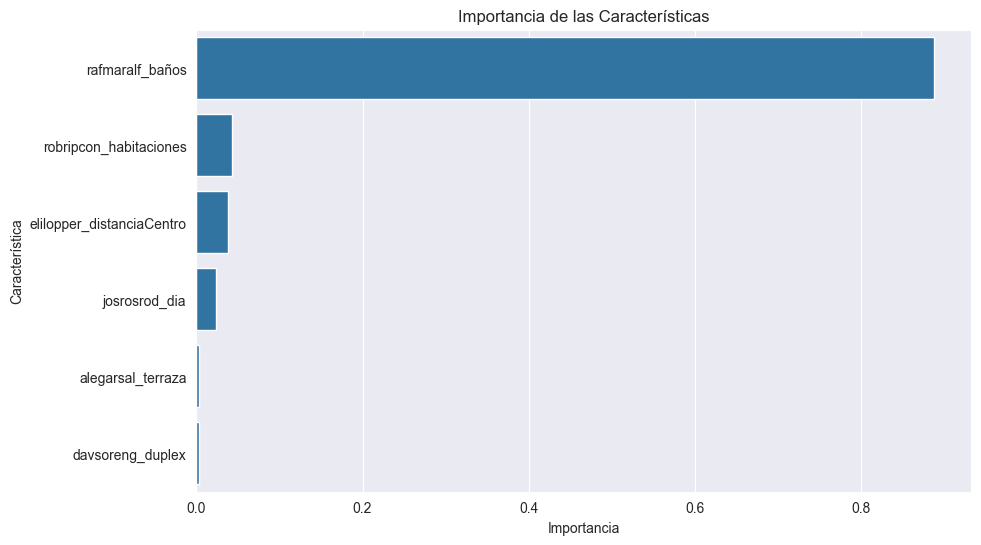

In [124]:
# Obtener la importancia de las características
importancias = rfr.feature_importances_
caracteristicas = ["rafmaralf_baños", "robripcon_habitaciones", "elilopper_distanciaCentro", "josrosrod_dia", "alegarsal_terraza", "davsoreng_duplex"]
# Crear un DataFrame con las importancias y los nombres de las características
importancias_df = pd.DataFrame({'Característica': caracteristicas, 'Importancia': importancias})

# Ordenar las importancias de forma descendente
importancias_df = importancias_df.sort_values('Importancia', ascending=False)

# Crear el gráfico de barras de importancia de características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=importancias_df)
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

In [125]:
knr = KNeighborsRegressor(n_neighbors=1)  # Añadir random_state para reproducibilidad
knr.fit(X_train, y_train)

# Predecir sobre el conjunto de validación
predicciones = knr.predict(X_val)

# Calcular el error
error_val = mean_absolute_error(y_val, predicciones)
print(f'Métrica para datos de validación: {error_val}')

Métrica para datos de validación: 91214.28571428571


## 6. Evaluación y selección de modelos


In [126]:
# Lista de modelos a evaluar
modelos = {
    "RandomForest": RandomForestRegressor(max_depth=5, random_state=42),
    "DecisionTree": DecisionTreeRegressor(max_depth=7, min_samples_split=10, random_state=42),
    "KNeighbors": KNeighborsRegressor(n_neighbors=1),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=1.0),
    "LinearRegression": LinearRegression()
}

# Diccionario para almacenar los resultados
resultados = {}

# Entrenar y evaluar cada modelo
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)  # Entrenar
    predicciones = modelo.predict(X_val)  # Predecir en validación
    error = mean_absolute_error(y_val, predicciones)  # Calcular métrica
    resultados[nombre] = error  # Guardar el error
    print(f'{nombre} - MAE: {error:.4f}')

# Seleccionar los dos mejores modelos (menor error MAE es mejor)
mejores_modelos = sorted(resultados.items(), key=lambda x: x[1])[:2]

print("\nMejores modelos:", mejores_modelos)

RandomForest - MAE: 85827.2265
DecisionTree - MAE: 104075.2759
KNeighbors - MAE: 91214.2857
Ridge - MAE: 194416.4441
Lasso - MAE: 195345.6716
LinearRegression - MAE: 195346.3817

Mejores modelos: [('RandomForest', np.float64(85827.2265323354)), ('KNeighbors', np.float64(91214.28571428571))]


## 7. Tunning y guardado del modelo final

In [127]:
pipelines = {
    'RandomForest': Pipeline([
        ('regressor', RandomForestRegressor(random_state=42))
    ]),
    'KNN': Pipeline([
        ('scaler', StandardScaler()),  # Normalizar datos para KNN
        ('regressor', KNeighborsRegressor())
    ])
}

param_grid = {
    'RandomForest': {
        'regressor__n_estimators': [50, 100, 200],  # Número de árboles
        'regressor__max_depth': [5, 10, 15]         # Profundidad máxima
    },
    'KNN': {
        'regressor__n_neighbors': [3, 5, 7]  # Número de vecinos
    }
}

best_models = {}
for name, pipeline in pipelines.items():
    print(f"Optimizando {name}...")
    grid_search = GridSearchCV(pipeline, param_grid[name], scoring='neg_mean_absolute_error', cv=5)
    grid_search.fit(X_train, y_train)  # Entrenar con búsqueda de hiperparámetros
    best_models[name] = grid_search.best_estimator_  # Guardar mejor modelo

    print(f"Mejor modelo para {name}: {grid_search.best_params_}")
    print(f"Mejor MAE en validación: {-grid_search.best_score_:.4f}\n")

test_errors = {}
for name, model in best_models.items():
    predicciones = model.predict(X_test)
    error_test = mean_absolute_error(y_test, predicciones)
    test_errors[name] = error_test
    print(f"Error en test para {name}: {error_test:.4f}")

best_model_name = min(test_errors, key=test_errors.get)
final_model = best_models[best_model_name]

y_pred = final_model.predict(X_test)
print(f"\nMejor modelo: {best_model_name}")
print(f"R² en test: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE en test: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

joblib.dump(final_model, "samartlop_modelo_u02_p03_a3.joblib")
print("Modelo guardado como 'samartlop_u02_p03_a3.joblib'")

Optimizando RandomForest...
Mejor modelo para RandomForest: {'regressor__max_depth': 15, 'regressor__n_estimators': 200}
Mejor MAE en validación: 192666.3844

Optimizando KNN...
Mejor modelo para KNN: {'regressor__n_neighbors': 7}
Mejor MAE en validación: 192695.1299

Error en test para RandomForest: 180839.1297
Error en test para KNN: 159994.8776

Mejor modelo: KNN
R² en test: -0.1121
RMSE en test: 293109.8800
Modelo guardado como 'samartlop_u02_p03_a3.joblib'


## 8. Conclusiones obtenidas


El modelo seleccionado como el mejor es el KNN (K-Nearest Neighbors), aunque su desempeño en términos de R² es negativo. Esto indica que el modelo tiene un rendimiento peor que un modelo que simplemente predice el valor medio de los datos. El modelo RandomForest, aunque no fue el mejor en términos de error en test, tiene un rendimiento más robusto en comparación con KNN.<br><br>
Los errores en test son los siguientes:

RandomForest: El error en test es de 180,839.13 (MAE), lo que sugiere que el modelo está dando predicciones razonablemente cercanas a los valores reales, pero hay espacio para mejorar.
KNN: El error en test es de 159,994.88 (MAE), lo que es más bajo que el de RandomForest, pero el valor de R² es negativo, lo que indica que el modelo no está capturando bien las relaciones subyacentes de los datos.<br><br>
Rendimiento del Mejor Modelo (KNN):

El R² en test es -0.1121, lo cual es muy bajo y negativo, lo que indica que el modelo no está logrando capturar la variabilidad en los datos.
El RMSE (Raíz del error cuadrático medio) es 293,109.88, lo que es un valor muy alto, indicando que las predicciones están bastante alejadas de los valores reales.
Valoración Final:
KNN tiene el mejor desempeño en términos de MAE, pero a pesar de eso, su desempeño es deficiente en cuanto a R² y RMSE, lo que sugiere que no es un modelo adecuado para este conjunto de datos. La capacidad de KNN de generalizar puede estar siendo limitada por una mala elección de hiperparámetros o por la naturaleza de los datos (posiblemente con muchas características o con mucho ruido).

RandomForest, aunque no fue seleccionado como el mejor, tiene un rendimiento de R² más razonable y un MAE decente en test. Este modelo es generalmente más robusto y menos sensible a los datos ruidosos en comparación con KNN, lo que lo hace un modelo más apropiado para datasets con una mayor complejidad.

Aunque KNN ha demostrado un error menor en el conjunto de prueba, su desempeño en cuanto a R² y RMSE sugiere que no es el modelo más adecuado para este caso. RandomForest, por su parte, ofrece un rendimiento más consistente y podría ser una mejor opción para la tarea, especialmente con más ajustes de parámetros y optimización de hiperparámetros.

In [128]:
def evaluar_modelo(modelo, datos_entrada, valores_reales=None):

    predicciones = modelo.predict(datos_entrada)
    resultados = []
    for i in range(len(datos_entrada)):
        resultado = {
            "ID de la Predicción": i + 1,
            "Datos de Entrada": datos_entrada.iloc[i].to_dict(),  # Convertir la fila a diccionario
            "Predicción del Modelo": predicciones[i],
        }
        if valores_reales is not None:
            resultado["Valor Real"] = valores_reales.iloc[i]
            resultado["Error"] = calcular_error(predicciones[i], valores_reales.iloc[i])
        resultados.append(resultado)
    return resultados

def calcular_error(prediccion, valor_real):

    return mean_squared_error([valor_real], [prediccion])

# Seleccionar 10 datos de prueba aleatorios para la evaluación
datos_prueba_10 = X_test.sample(10, random_state=42)
valores_reales_10 = y_test[datos_prueba_10.index]

# Evaluar el modelo con los 10 datos de prueba
resultados = evaluar_modelo(final_model, datos_prueba_10, valores_reales_10)

# Imprimir los resultados
for resultado in resultados:
    print(f"{resultado}\n")

{'ID de la Predicción': 1, 'Datos de Entrada': {'rafmaralf_baños': 1.0, 'robripcon_habitaciones': 2.0, 'elilopper_distanciaCentro': 2.1, 'josrosrod_dia': 28.0, 'alegarsal_terraza': 1.0, 'davsoreng_duplex': 0.0}, 'Predicción del Modelo': np.float64(149428.57142857142), 'Valor Real': np.float64(150000.0), 'Error': np.float64(326530.6122449075)}

{'ID de la Predicción': 2, 'Datos de Entrada': {'rafmaralf_baños': 2.0, 'robripcon_habitaciones': 2.0, 'elilopper_distanciaCentro': 31.0, 'josrosrod_dia': 20.0, 'alegarsal_terraza': 1.0, 'davsoreng_duplex': 0.0}, 'Predicción del Modelo': np.float64(194000.0), 'Valor Real': np.float64(285000.0), 'Error': np.float64(8281000000.0)}

{'ID de la Predicción': 3, 'Datos de Entrada': {'rafmaralf_baños': 3.0, 'robripcon_habitaciones': 4.0, 'elilopper_distanciaCentro': 9.0, 'josrosrod_dia': 15.0, 'alegarsal_terraza': 0.0, 'davsoreng_duplex': 1.0}, 'Predicción del Modelo': np.float64(256428.57142857142), 'Valor Real': np.float64(250000.0), 'Error': np.float